In [1]:
import time
import sys; sys.path.insert(0, "..")
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

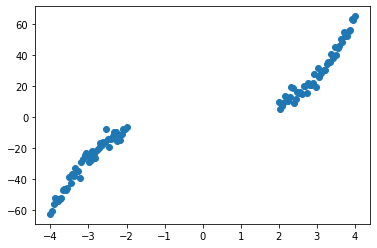

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)
plt.scatter(x, y)
plt.show()

# Extract test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = y_test[gap_idx].reshape(1,-1)

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = y_test[non_gap_idx].reshape(1,-1)

In [4]:
def experiment_NLM_1D(reg_param, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    nlm = NLM(architecture, random=random)
    print("")
    print(f"===== NLM [ Regularization: {reg_param} ]  =====")
    print("")
    t0 = time.time()
    nlm.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return nlm

In [5]:
reg_grid = [0., 0.001, 0.01, 0.1, 1., 10., 100.,1000.]
step_size = 1e-2
max_iteration = 10000


In [6]:
nlm_list = []
for reg in reg_grid:
    nlm = experiment_NLM_1D(reg, step_size = step_size, max_iteration = max_iteration)
    nlm_list.append(nlm)


===== NLM [ Regularization: 0.0 ]  =====

Iteration 0 loss 8490.381077171127; gradient mag: 19562.698938872065
Iteration 100 loss 81.32102906448964; gradient mag: 64.4882710187299
Iteration 200 loss 24.69864206008609; gradient mag: 30.8592109374861
Iteration 300 loss 9.973730146888977; gradient mag: 8.190010524924109
Iteration 400 loss 8.334001532028607; gradient mag: 2.7995837543391793
Iteration 500 loss 8.025745304107165; gradient mag: 1.093251355326843
Iteration 600 loss 7.968422209582834; gradient mag: 0.646870233158167
Iteration 700 loss 7.939093848099427; gradient mag: 0.535972626435919
Iteration 800 loss 7.919525294710343; gradient mag: 0.44470096548968263
Iteration 900 loss 7.90662351032184; gradient mag: 0.3394189978651711
Iteration 1000 loss 7.898290125764413; gradient mag: 0.25893220765108116
Iteration 1100 loss 7.893221877804073; gradient mag: 0.21954195556787573
Iteration 1200 loss 7.890282685751978; gradient mag: 0.13993052693786806
Iteration 1300 loss 7.697798457312306;

Iteration 1400 loss 7.1202749582734; gradient mag: 58.19602382690649
Iteration 1500 loss 7.042964893051889; gradient mag: 11.73518344731489
Iteration 1600 loss 7.034931777900437; gradient mag: 14.453271967617288
Iteration 1700 loss 7.054476638717758; gradient mag: 33.01012784712051
Iteration 1800 loss 7.443450303860915; gradient mag: 142.4478743210012
Iteration 1900 loss 7.006789466174024; gradient mag: 2.5866863673584417
Iteration 2000 loss 7.003232754916714; gradient mag: 5.0343795796778705
Iteration 2100 loss 6.996646644866042; gradient mag: 5.449145341510601
Iteration 2200 loss 6.992488627638057; gradient mag: 6.572110133701122
Iteration 2300 loss 6.984595438161021; gradient mag: 7.958958182974335
Iteration 2400 loss 6.976923738908997; gradient mag: 2.810527780258203
Iteration 2500 loss 6.977781707002845; gradient mag: 13.716970036079113
Iteration 2600 loss 6.9924014694022905; gradient mag: 34.02381125684566
Iteration 2700 loss 6.983959162860553; gradient mag: 27.717310470663087
It

Iteration 2800 loss 6.485257405732667; gradient mag: 28.493821817317126
Iteration 2900 loss 6.456290977888508; gradient mag: 15.361804770106794
Iteration 3000 loss 6.491158943527425; gradient mag: 54.40124343096842
Iteration 3100 loss 6.467584369059385; gradient mag: 37.257051411824335
Iteration 3200 loss 6.893593323974115; gradient mag: 162.97401084880354
Iteration 3300 loss 6.4447705880059525; gradient mag: 36.056389930153635
Iteration 3400 loss 6.597697311594208; gradient mag: 106.83223360430813
Iteration 3500 loss 6.465633822284827; gradient mag: 54.56782386549064
Iteration 3600 loss 6.423984616399971; gradient mag: 34.28249413202718
Iteration 3700 loss 6.706674339904562; gradient mag: 136.3550852479013
Iteration 3800 loss 6.538092727150288; gradient mag: 89.70913494098902
Iteration 3900 loss 6.941971000688317; gradient mag: 188.42328242620061
Iteration 4000 loss 6.492575019163999; gradient mag: 82.20292017298215
Iteration 4100 loss 6.621125506564018; gradient mag: 121.972092974161

Iteration 4200 loss 6.460095864353168; gradient mag: 22.800169751891353
Iteration 4300 loss 6.492088603211287; gradient mag: 47.877114193504454
Iteration 4400 loss 6.620151791736271; gradient mag: 101.16276268688384
Iteration 4500 loss 6.657944628725071; gradient mag: 107.65937206032268
Iteration 4600 loss 6.567190747739448; gradient mag: 87.58447993568554
Iteration 4700 loss 6.428967941644231; gradient mag: 8.37157898306572
Iteration 4800 loss 6.5300639972099574; gradient mag: 76.85167517379973
Iteration 4900 loss 6.515285230559105; gradient mag: 71.32045047651532
Iteration 5000 loss 6.434570904530591; gradient mag: 31.34312704364336
Iteration 5100 loss 6.424476538590732; gradient mag: 36.58734844647942
Iteration 5200 loss 6.410529502279599; gradient mag: 26.062049516686997
Iteration 5300 loss 6.654942925848137; gradient mag: 119.71501903101452
Iteration 5400 loss 6.438344364130528; gradient mag: 49.03587167762347
Iteration 5500 loss 7.573852269965242; gradient mag: 248.08750458961404

Iteration 5600 loss 7.240674485375244; gradient mag: 8.21459040794141
Iteration 5700 loss 7.232395546038865; gradient mag: 3.8960348991306923
Iteration 5800 loss 7.235127487696317; gradient mag: 17.356014991819897
Iteration 5900 loss 7.258794020287044; gradient mag: 38.454346529541134
Iteration 6000 loss 7.525614969952955; gradient mag: 110.21826128016322
Iteration 6100 loss 7.207020871912882; gradient mag: 6.33470423085257
Iteration 6200 loss 7.3454599328160075; gradient mag: 79.60763482943864
Iteration 6300 loss 7.478885341921271; gradient mag: 113.46796879520339
Iteration 6400 loss 7.209681719187487; gradient mag: 22.70781410723432
Iteration 6500 loss 7.897065467733225; gradient mag: 183.51304662664262
Iteration 6600 loss 7.194123414401714; gradient mag: 22.173176948263706
Iteration 6700 loss 7.243173571634464; gradient mag: 54.86822458296257
Iteration 6800 loss 7.187986512703615; gradient mag: 26.542399858636234
Iteration 6900 loss 7.170751316160744; gradient mag: 10.37956029209421

Iteration 7000 loss 9.533764897584525; gradient mag: 70.91675118054636
Iteration 7100 loss 9.52083837862012; gradient mag: 75.00209933901063
Iteration 7200 loss 9.328333695390361; gradient mag: 18.082442076737404
Iteration 7300 loss 9.30601317388633; gradient mag: 26.165291935648405
Iteration 7400 loss 9.915818717102368; gradient mag: 147.71908391322435
Iteration 7500 loss 9.545415426119083; gradient mag: 103.56701717318192
Iteration 7600 loss 9.20467978380194; gradient mag: 15.06884102773944
Iteration 7700 loss 9.158182292414189; gradient mag: 4.357854872032364
Iteration 7800 loss 9.128401106844628; gradient mag: 4.431235965165826
Iteration 7900 loss 9.107145632432855; gradient mag: 23.406897568972
Iteration 8000 loss 9.074078366677185; gradient mag: 10.868093404532376
Iteration 8100 loss 9.0417921108958; gradient mag: 6.882101520962594
Iteration 8200 loss 9.00518555456937; gradient mag: 4.167845002049996
Iteration 8300 loss 8.981057980015358; gradient mag: 5.506336875331537
Iteration

Iteration 8400 loss 12.116032999351134; gradient mag: 29.824013172953098
Iteration 8500 loss 12.023716378414413; gradient mag: 16.308684806019755
Iteration 8600 loss 11.993403217731807; gradient mag: 9.222053068634587
Iteration 8700 loss 11.997524714675896; gradient mag: 19.427282518835963
Iteration 8800 loss 11.953947441035954; gradient mag: 11.689282106714378
Iteration 8900 loss 11.932515476401617; gradient mag: 9.429207895648437
Iteration 9000 loss 11.924165951482557; gradient mag: 9.844831894539814
Iteration 9100 loss 12.08944366593642; gradient mag: 45.2601628754363
Iteration 9200 loss 11.974750039555133; gradient mag: 31.425266918749617
Iteration 9300 loss 11.89240745301013; gradient mag: 14.651899486166558
Iteration 9400 loss 11.8667937234312; gradient mag: 7.303646084884064
Iteration 9500 loss 11.858043387731446; gradient mag: 11.909180031546686
Iteration 9600 loss 11.864842581257808; gradient mag: 16.594087565042006
Iteration 9700 loss 11.826782029850794; gradient mag: 4.13212

Iteration 9800 loss 43.11797178672224; gradient mag: 11.805639749771796
Iteration 9900 loss 43.15418986362345; gradient mag: 21.683643774103558

Training took 0:19:39 (h:mm:ss)


## Plot prior samples

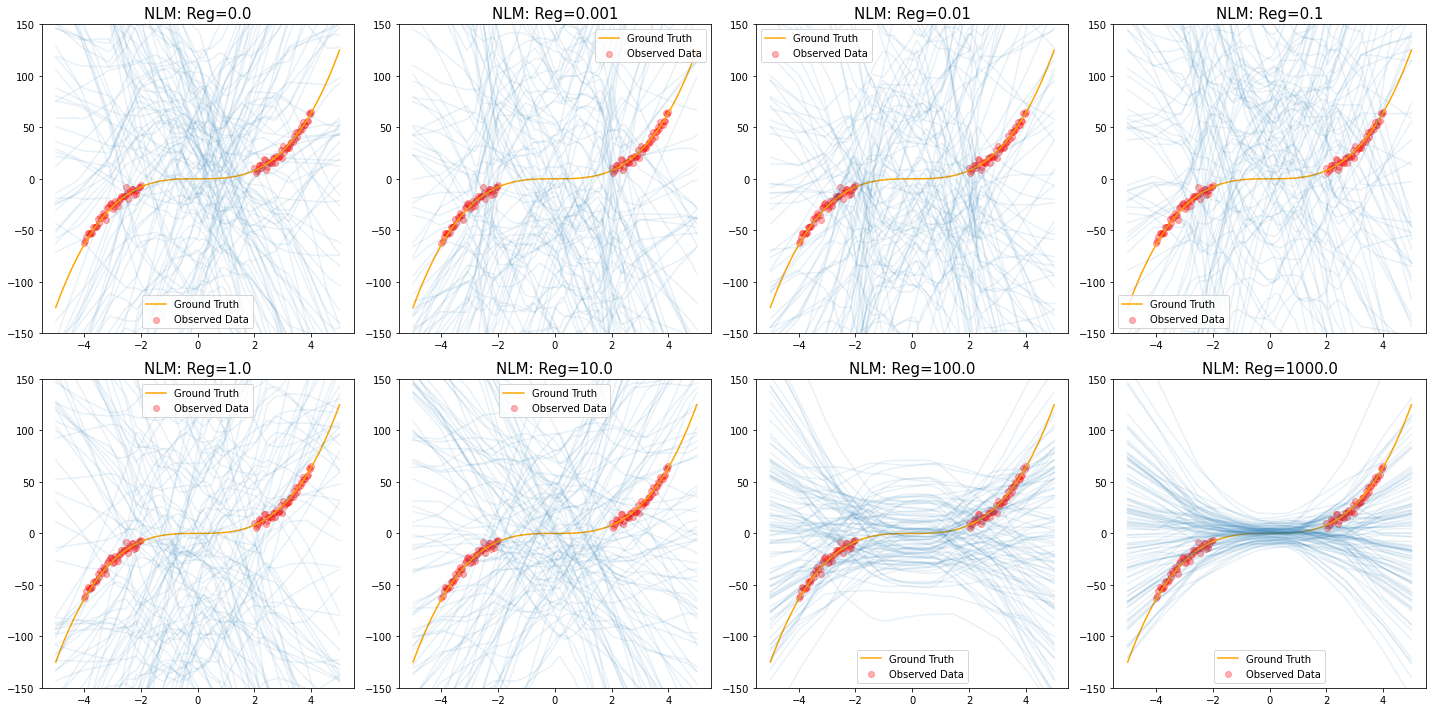

In [19]:
prior_mean = 0; prior_var = 9; noise_var = 9

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_title(f"NLM: Reg={reg_grid[i]}",fontsize = 15)
    ax.set_ylim([-150, 150])
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

## Plot posterior samples

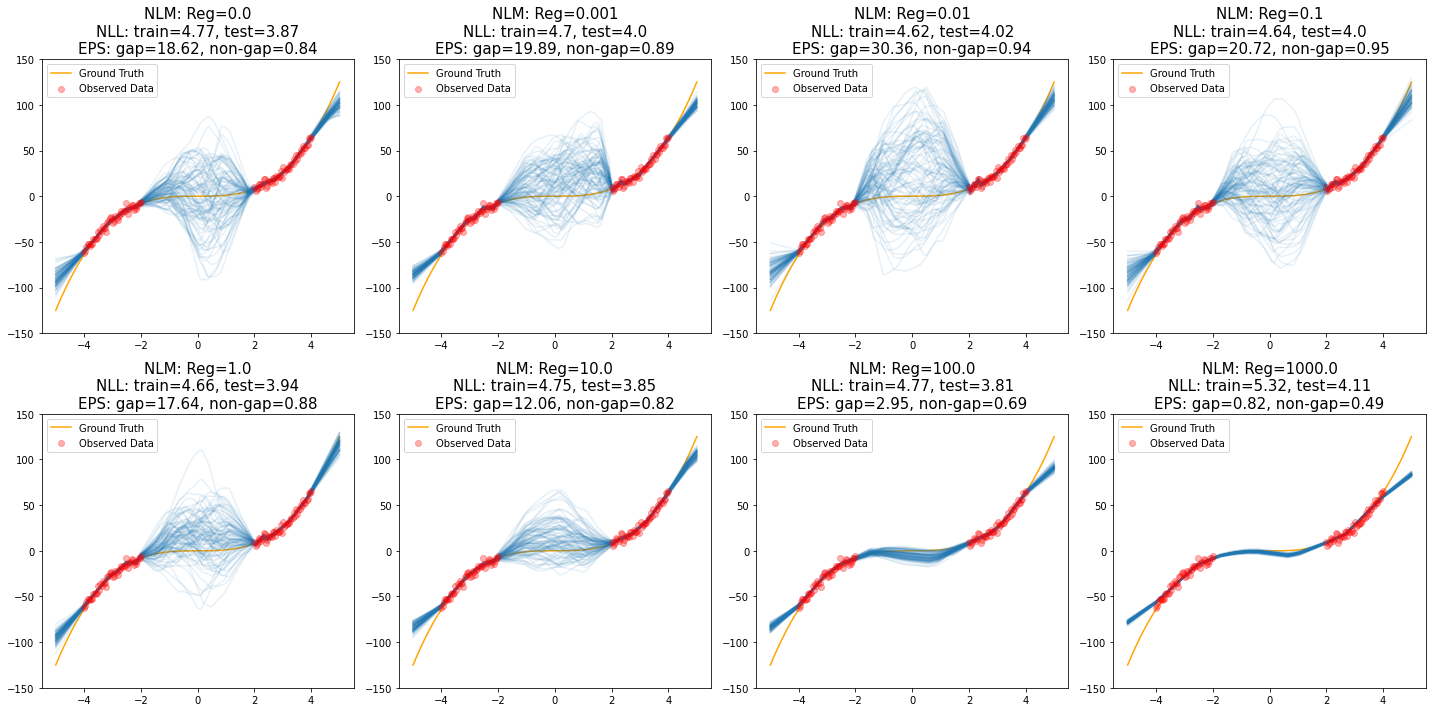

In [20]:
nll_train_list_nlm = []
nll_test_list_nlm = []
eps_gap_list_nlm = []
eps_non_gap_list_nlm = []

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_nlm.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_nlm.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=15)
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()


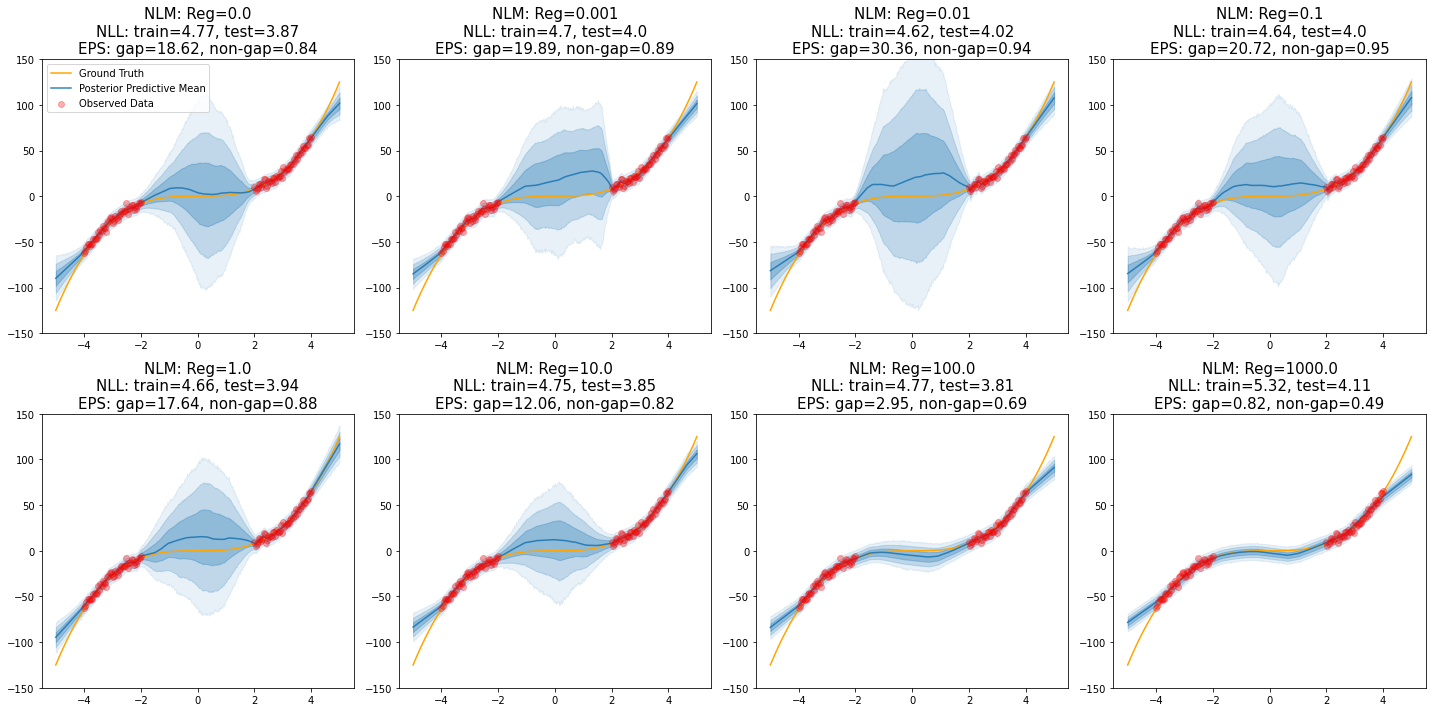

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])
    ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=15)

    if i == 0:
        ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()
